> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **DATA SET**: No-Show Appointment is a dataset shows information about 100k medical appointment gatherd from Brazil. Its main goal to answer the question wether the patients show-up for the appointment or not .


# importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
# general overview about the dataset 
# first observation:
# 1- no dublicates 
# 2- no Nan values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check nulls 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# check unique values in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# descriptive statistics for each column in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# No-Show column indecate that if the patient come to appointment or not 
# I want to know the details for this column 
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

## First impression 

> **Tip**: The number of absences for the appointment are more than the attendees

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# columns renaming 

df.rename(columns={'PatientId':'patient_id',
                   'AppointmentID':'appointment_id',
                   'ScheduledDay':'scheduled_day',
                   'Gender':'gender',
                   'Age':'age',
                   'Scholarship':'scholarship',
                   'Diabetes':'diabetes',
                   'Alcoholism':'alcoholism',
                   'SMS_received':'sms_received',
                   'AppointmentDay':'appointment_day',
                   'Neighbourhood':'location',
                   'Hipertension':'hypertension',
                   'Handcap':'handicap',
                   'No-show':'no_show', }, inplace=True)

df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
# convert patient_id to int64.
# I make a clone (df1) for in anticipation of any error

df1 = df 
df1['patient_id'] = df1['patient_id'].astype('int64')

type(df1['patient_id'])

df1.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [21]:
# change no_show column from [yse, no] to [1, 0] 
df1['no_show'].replace({'No':0,'Yes':1},inplace=True)

df1.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [24]:
#convert scheduled_day and appointment_day to datetime

df1.appointment_day = df1.appointment_day.apply(np.datetime64)
df1.scheduled_day   = df1.scheduled_day.apply(np.datetime64)

df1.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,location,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
location           110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


In [28]:
# remove the age under 0 & above 95 

df1 = df1[(df1.age >= 0) & (df1.age <= 95)]
df1.loc[(df1['age'] < 0) | (df1['age'] > 100)].count()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
location           0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What are the relation between the dataset feature and show-up?


In [30]:
columns = ['gender','hypertension','alcoholism','diabetes', 'sms_received']
for r in columns :
    print(df1.groupby(r)['no_show'].mean())


gender
F    0.20317
M    0.19970
Name: no_show, dtype: float64
hypertension
0    0.209048
1    0.173058
Name: no_show, dtype: float64
alcoholism
0    0.201970
1    0.201488
Name: no_show, dtype: float64
diabetes
0    0.203641
1    0.180169
Name: no_show, dtype: float64
sms_received
0    0.167036
1    0.275777
Name: no_show, dtype: float64


In [35]:
def missed_ratio(dataframe, feature, value):
    all_appoints = len(dataframe.loc[dataframe[feature] == value])
    missid_appoints = len(dataframe.loc[(dataframe[feature] == value) & (df1['no_show'] == 1)])
    return (missid_appoints / all_appoints) * 100

> Nont: One surprise cames on the number of show-up of patients who received sms message  is less the patients who did't receive sms message

### Research Question 2: How gender distribution will affect the show-up?

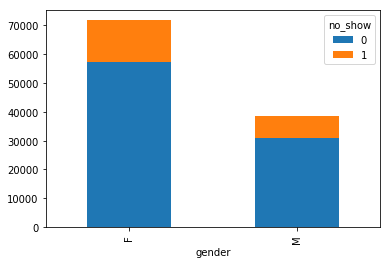

In [57]:
df1.groupby(['gender', 'no_show'])['gender'].count().unstack('no_show').plot(kind='bar', stacked=True)

### Gender distribution figure

> explain: this figure shows each gender how it related to the show-up 

### Research Question 3 : How each health diagnosis related with show-up? 

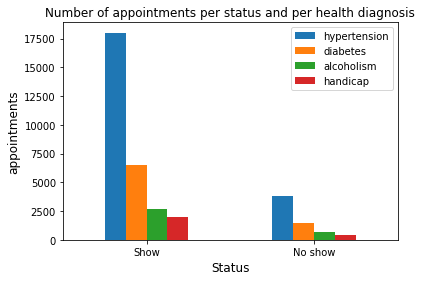

In [58]:
ax = df1.groupby('no_show').sum()[['hypertension','diabetes','alcoholism','handicap']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("appointments",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of appointments per status and per health diagnosis')
plt.show();

### Health diagnosis figure 

> explain:  this figure shows each health diagnosis how it related to the show-up

### Research Question 3 : How age related with show-up? 

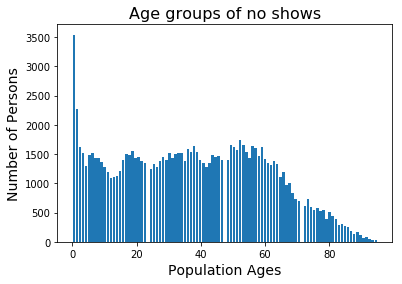

In [54]:
for i in range(100):
    bins = i


plt.hist(df1.age,bins=bins,histtype='bar',rwidth=0.8)
plt.xlabel('Population Ages',fontsize=14)
plt.ylabel('Number of Persons',fontsize=14)
plt.title('Age groups of no shows',fontsize=16)
plt.show()

### Age distribution figure

> explain: this figure shows each health diagnosis how age related with show-up

### Limitation 

###### • The dataset has shot period if it has longer time the data will be more reliable 
###### • The collected only for one city 

# <a id='conclusions'></a>
## Conclusions

###### • 80% of all appointments investigated were no-shows
###### • number of show-up of patients who received sms message is less the patients who did't receive sms message
###### • chiledren tendes to show up more 
###### • males and females has the same percentage to show up 20%



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0